# Experiment Description

<p> We are going to optimize the instruction prefix used in our manual templates using the gradient-based search. We are going to apply the gradient-based search to find better instructions. </p>

For example: <b>Gradient-Search for Instruction Prefix</b><br><br>
  - <b>Sentence:</b><br>
  'I hate watching this movie.'<br>

  - <b>Initial Template:</b><br>
  'Generate the sentiment of the next sentence. I hate watching this movie.'<br>

  - <b>Gradient-Search</b> (based on autoprompt) will only update the instruction tokens "Generate the sentiment of the next sentence."<br>

<font color='red'>__Some important considerations__: If you are getting CUDA out-of-memory errors on this notebook, you may try a few things

1. Shutdown other notebooks that are running on the Jupyter instance (go to the “running” tab to see what else is running simultaneously)

2. If you have not done so already, start the notebooks up on an A40 GPU following the readme here: `src/reference_implementations/prompt_zoo/README.md`

3. Reduce the batch size in the commands launching inference or training
</font>

<p>Navigate to the directory containing src</p>

In [1]:
import os

os.chdir("../../../../")

# define the user main directory to store predictions and training checkpoints.
os.environ["USER_DIR"] = f"/scratch/ssd004/scratch/{os.environ['USER']}"

# Experiment on SemEval Sentiment



In [3]:
!rm -r -f "${USER_DIR}/gradient_search_experiments/semeval"
!rm -r -f "${USER_DIR}/gradient_search_long_training/semeval"

!mkdir -p "${USER_DIR}/gradient_search_experiments"
!mkdir -p "${USER_DIR}/gradient_search_experiments/semeval"

!mkdir -p "${USER_DIR}/gradient_search_long_training"
!mkdir -p "${USER_DIR}/gradient_search_long_training/semeval"

__Note__ that you can change the argument --gradient_search_initial_prompt and the input text to change the initial prompt from which to search. The initial prompt is strictly prepended to the input_text to create a prompt for the model. 

__Note__ The logging on no instruction used just means that no additional modifications to the prompt are made.

__Note__ This will take some time to run as 100 batches need to complete. 

In [4]:
!python -m src.reference_implementations.prompt_zoo.trainer \
    --train_batch_size 24 \
    --eval_batch_size 2048 \
    --mode train \
    --task_name semeval \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --train_file ./resources/datasets/2018-Valence-oc-En-train.txt \
    --dev_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path ${USER_DIR}/gradient_search_experiments/semeval \
    --prediction_file ${USER_DIR}/gradient_search_experiments/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --max_epochs 2 \
    --training_steps 100 \
    --steps_per_checkpoint 2 \
    --beam_size 1 \
    --top_k 40 \
    --gradient_search_initial_prompt "Generate the sentiment of the next sentence. "

2023-03-07 11:48:15.162852: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-07 11:48:15.162958: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-07 11:48:15.163031: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-07 11:48:15.163100: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-03-07 11:48:15.163131: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

Epoch: 0 | Batch: 41 | Mean Loss: 17.57304373020079 | Epoch Loss: 17.57304373020079 | Loss: 18.560781478881836

Epoch: 0 | Batch: 42 | Mean Loss: 17.549064409165155 | Epoch Loss: 17.549064409165155 | Loss: 16.5659122467041

evaluating batch with prompt template: ['positiv', 'Objective', 'the', 'mood', 'of', 'the', 'next', 'sentence', 'coral']
Epoch: 0 | Batch: 43 | Mean Loss: 17.546446290127065 | Epoch Loss: 17.546446290127065 | Loss: 17.436485290527344

Epoch: 0 | Batch: 44 | Mean Loss: 17.527123494581744 | Epoch Loss: 17.527123494581744 | Loss: 16.696243286132812

evaluating batch with prompt template: ['positiv', 'Fond', 'the', 'mood', 'of', 'the', 'Cornwall', 'sentence', '.']
Epoch: 0 | Batch: 45 | Mean Loss: 17.523623021443687 | Epoch Loss: 17.523623021443687 | Loss: 17.36960220336914

Epoch: 0 | Batch: 46 | Mean Loss: 17.508536670518957 | Epoch Loss: 17.508536670518957 | Loss: 16.82965087890625

evaluating batch with prompt template: ['positiv', 'Renewable', 'the', 'mood', 'of', 

Epoch: 1 | Batch: 38 | Mean Loss: 17.276341340758584 | Epoch Loss: 16.948703339225368 | Loss: 16.675588607788086

evaluating batch with prompt template: ['negative', 'Objective', 'the', 'negative', 'lavender', 'Scottsdale', 'replied', 'sentence', 'Rather']
Epoch: 1 | Batch: 39 | Mean Loss: 17.262856119134455 | Epoch Loss: 16.92633034632756 | Loss: 16.076156616210938

Epoch: 1 | Batch: 40 | Mean Loss: 17.25713741514418 | Epoch Loss: 16.921876406669618 | Loss: 16.748172760009766

evaluating batch with prompt template: ['negative', 'Objective', 'the', 'negative', 'lavender', 'tuft', 'next', 'taire', 'Rather']
Epoch: 1 | Batch: 41 | Mean Loss: 17.247360763969002 | Epoch Loss: 16.90835410792653 | Loss: 16.367462158203125

Epoch: 1 | Batch: 42 | Mean Loss: 17.225857288941093 | Epoch Loss: 16.869322844914027 | Loss: 15.269041061401367

evaluating batch with prompt template: ['negative', 'Objective', 'cazuri', 'negative', 'european', 'tuft', 'next', 'sentence', 'Rather']
Epoch: 1 | Batch: 43 |

Below we evaluate what the performance of our original prompt was on the evaluation set

In [5]:
# test with the default initial prompt
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --mode no_finetune_test \
    --task_name semeval \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path ${USER_DIR}/gradient_search_experiments/semeval \
    --prediction_file ${USER_DIR}/gradient_search_experiments/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --gradient_search_initial_prompt "Generate the sentiment of the next sentence. "

2023-03-07 12:11:10.837440: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-07 12:11:10.837558: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-07 12:11:10.837636: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:11:10.837715: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:11:10.837752: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

Next we load the best prompt that we computed in our search above and test it's performance on the evaluation set

In [6]:
# test with the best saved prompt
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --mode test \
    --task_name semeval \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path ${USER_DIR}/gradient_search_experiments/semeval \
    --prediction_file ${USER_DIR}/gradient_search_experiments/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \

2023-03-07 12:11:48.217985: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-07 12:11:48.218093: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-07 12:11:48.218167: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:11:48.218237: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:11:48.218270: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

In [ ]:
# You can also run the tensorboard from the node to monitor training status as we are training with gradient-search.
!tensorboard --logdir=${USER_DIR}/gradient_search_experiments/semeval --bind_all

2023-03-07 12:54:06.345424: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 12:54:06.345460: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 12:54:08.997203: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 12:54:08.997502: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:54:08.997704: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: lib

To view the tensorboard, we have to create another ssh tunnel from the local computer to the gpu node.
use the following command with the port specified by the tensorboard command above (e.g. 6006)
then type following URL in your local web browser: http://localhost:6006/

`ssh username@v.vectorinstitute.ai -L 6006:gpu001:6006`

__NOTE__: Before running any additional cells, you'll need to stop the tensorboard cell with the stop button

# Gradient Search Result on SemEval
We see that the gradient-based search could find the following optimal prompt tokens instead of "Generate the sentiment of the next sentence. "

['negative', 'Objective', 'cazuri', 'negative', 'european', 'tuft', 'next', 'sentence', 'Rather']

The new template increase the performance to 60.13% accuracy from 58.8% with the original instruction.

The new prompt has discovered the 'negative' label and earlier in training explores the positive label as well!

 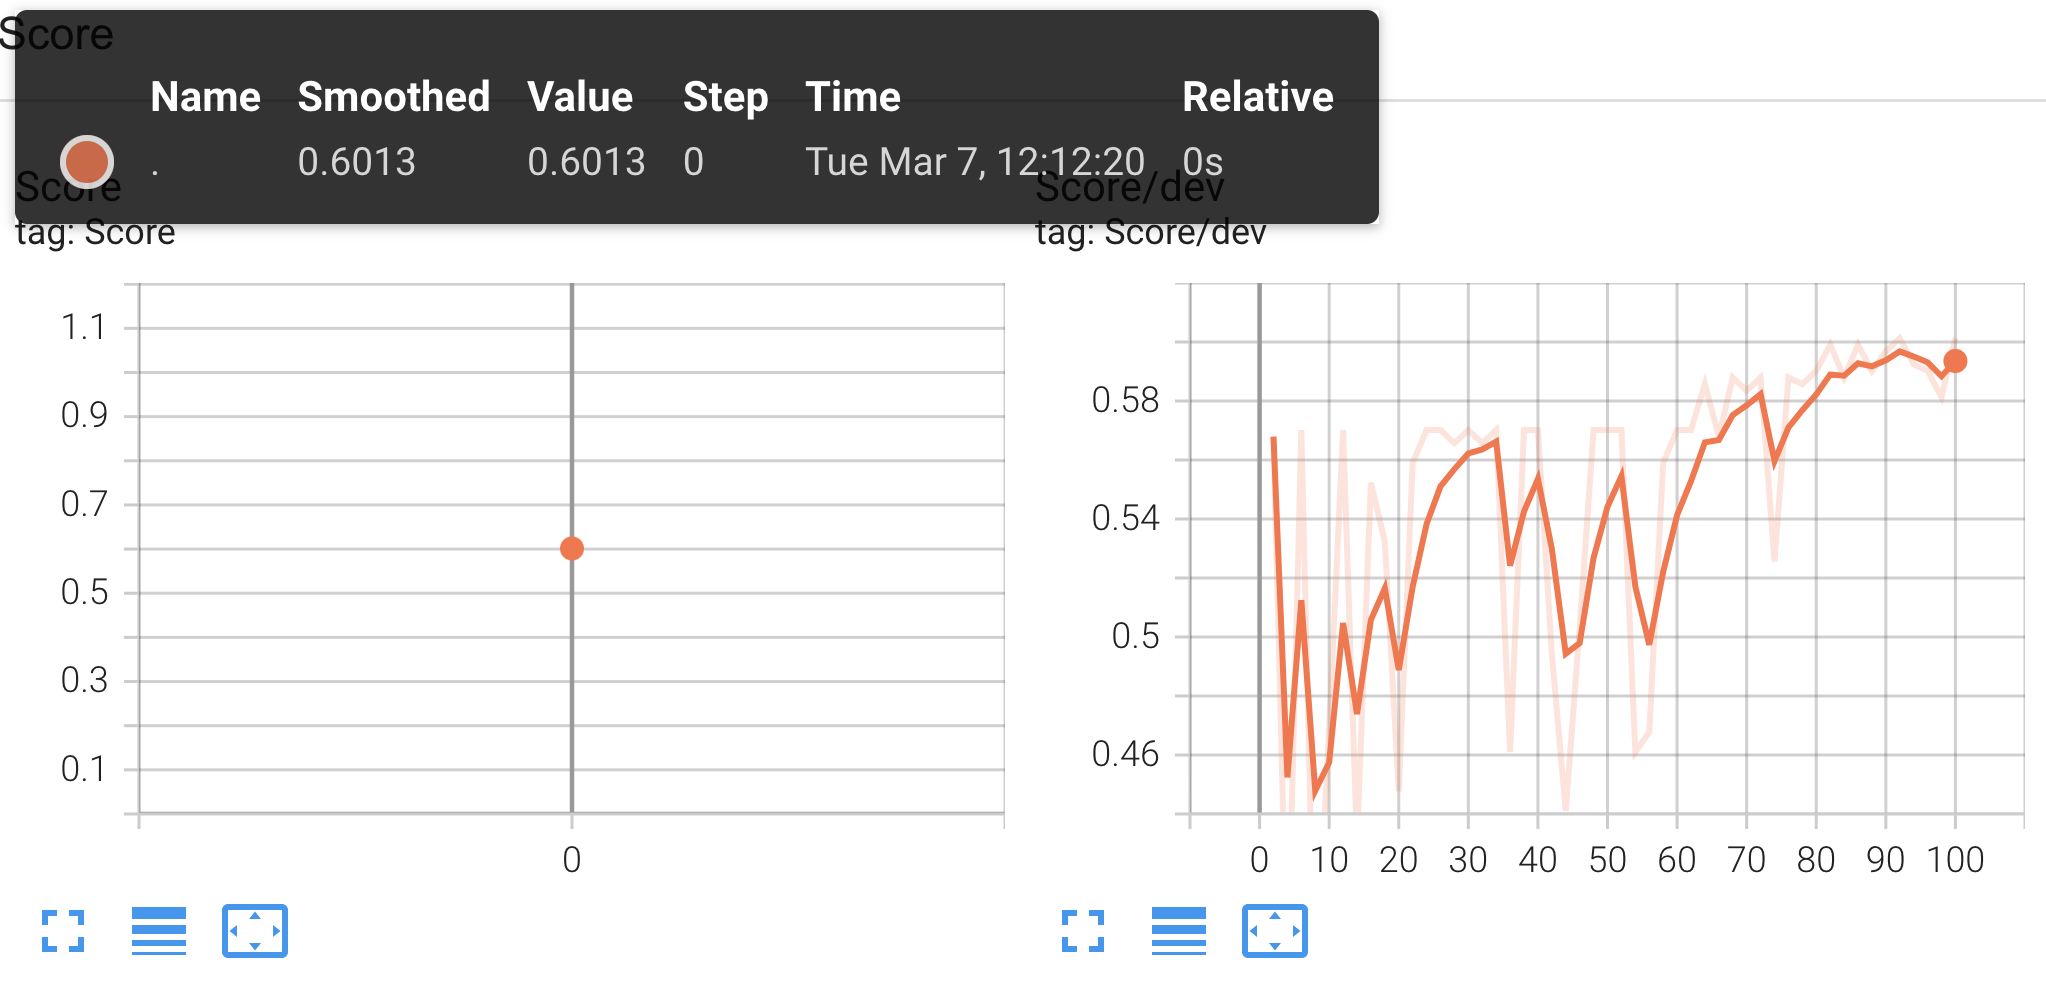

# Experiments on SST-2 Binary Sentiment Classification Task


Similar to SemEval, we can gradient-search to further optimize the instruction at the start on the SST-2 dataset.

In [7]:
!rm -r -f "${USER_DIR}/gradient_search_experiments/sst2"
!rm -r -f "${USER_DIR}/gradient_search_long_training/sst2"

!mkdir -p "${USER_DIR}/gradient_search_experiments"
!mkdir -p "${USER_DIR}/gradient_search_experiments/sst2"

!mkdir -p "${USER_DIR}/gradient_search_long_training"
!mkdir -p "${USER_DIR}/gradient_search_long_training/sst2"

__Note__ that you can change the argument --gradient_search_initial_prompt and the input text to change the initial prompt from which to search. The initial prompt is strictly prepended to the input_text to create a prompt for the model. 

__Note__ The logging on no instruction used just means that no additional modifications to the prompt are made.

__Note__ This will take some time to run as 100 batches need to be completed

In [8]:
# Search only for 100 training steps!
# Change the argument --gradient_search_initial_prompt for another initial prompt.
!python -m src.reference_implementations.prompt_zoo.trainer \
    --train_batch_size 24 \
    --eval_batch_size 1024 \
    --mode train \
    --task_name sst2 \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --train_file train \
    --dev_file validation \
    --test_file validation \
    --model_path ${USER_DIR}/gradient_search_experiments/sst2 \
    --prediction_file ${USER_DIR}/gradient_search_experiments/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --max_epochs 1 \
    --training_steps 100 \
    --steps_per_checkpoint 2 \
    --beam_size 1 \
    --top_k 40 \
    --gradient_search_initial_prompt "Generate the sentiment of the next sentence. "

2023-03-07 12:12:26.209403: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-07 12:12:26.209515: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-07 12:12:26.209586: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:12:26.209655: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:12:26.209688: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

evaluating batch with prompt template: ['tumour', 'negative', 'the', 'negative', 'respins', 'the', 'Contains', 'sentence', '.']
W0307 12:16:48.324792 140357331411072 builder.py:798] Found cached dataset sst2 (/h/demerson/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0307 12:16:48.329660 140357331411072 arrow_dataset.py:2942] Loading cached processed dataset at /h/demerson/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5/cache-729fd6438998cb66.arrow
Epoch: 0 | Batch: 15 | Mean Loss: 15.898103205362956 | Epoch Loss: 15.898103205362956 | Loss: 15.447946548461914

Epoch: 0 | Batch: 16 | Mean Loss: 15.838652729988098 | Epoch Loss: 15.838652729988098 | Loss: 14.946895599365234

evaluating batch with prompt template: ['tumour', 'negative', 'the', 'negative', 'respins', 'the', 'Contains', 'sentence', '.']
evaluating batch with prompt template: ['tumour', 'negative'

Epoch: 0 | Batch: 32 | Mean Loss: 15.199445456266403 | Epoch Loss: 15.199445456266403 | Loss: 14.86372184753418

evaluating batch with prompt template: ['tumour', 'negative', 'the', 'adjective', 'respins', '-01', 'Contains', 'sentence', '.']
evaluating batch with prompt template: ['tumour', 'negative', 'the', 'adjective', 'respins', '-01', 'Contains', 'sentence', '.']
W0307 12:21:37.234994 140357331411072 builder.py:798] Found cached dataset sst2 (/h/demerson/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0307 12:21:37.240417 140357331411072 arrow_dataset.py:2942] Loading cached processed dataset at /h/demerson/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5/cache-729fd6438998cb66.arrow
Epoch: 0 | Batch: 33 | Mean Loss: 15.216482509266246 | Epoch Loss: 15.216482509266246 | Loss: 15.76166820526123

Epoch: 0 | Batch: 34 | Mean Loss: 15.22267734303194 | Epoch 

Epoch: 0 | Batch: 49 | Mean Loss: 15.050872296703105 | Epoch Loss: 15.050872296703105 | Loss: 14.685022354125977

Epoch: 0 | Batch: 50 | Mean Loss: 15.05263828277588 | Epoch Loss: 15.05263828277588 | Loss: 15.139171600341797

evaluating batch with prompt template: ['tumour', 'negative', 'the', 'negative', 'respins', 'the', 'Contains', 'sentence', '.']
evaluating batch with prompt template: ['tumour', 'negative', 'the', 'negative', 'respins', 'the', 'Contains', 'sentence', '.']
W0307 12:26:37.748397 140357331411072 builder.py:798] Found cached dataset sst2 (/h/demerson/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0307 12:26:37.753175 140357331411072 arrow_dataset.py:2942] Loading cached processed dataset at /h/demerson/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5/cache-729fd6438998cb66.arrow
Epoch: 0 | Batch: 51 | Mean Loss: 15.048016809949688 | Epoch L

Epoch: 0 | Batch: 67 | Mean Loss: 14.888093179731227 | Epoch Loss: 14.888093179731227 | Loss: 14.446434020996094

Epoch: 0 | Batch: 68 | Mean Loss: 14.867153939078836 | Epoch Loss: 14.867153939078836 | Loss: 13.464224815368652

evaluating batch with prompt template: ['tumour', 'negative', 'igh', 'Positive', 'respins', 'the', 'Contains', 'sentence', 'Example']
evaluating batch with prompt template: ['tumour', 'negative', 'igh', 'Positive', 'respins', 'the', 'Contains', 'sentence', 'Example']
W0307 12:31:35.008247 140357331411072 builder.py:798] Found cached dataset sst2 (/h/demerson/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0307 12:31:35.012816 140357331411072 arrow_dataset.py:2942] Loading cached processed dataset at /h/demerson/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5/cache-729fd6438998cb66.arrow
Epoch: 0 | Batch: 69 | Mean Loss: 14.85943920024

Epoch: 0 | Batch: 85 | Mean Loss: 14.717471032984117 | Epoch Loss: 14.717471032984117 | Loss: 14.236735343933105

Epoch: 0 | Batch: 86 | Mean Loss: 14.711885707322942 | Epoch Loss: 14.711885707322942 | Loss: 14.237133026123047

evaluating batch with prompt template: ['tumour', 'negative', '.05.', 'Positive', 'respins', 'selber', 'Contains', 'sentence', '.']
evaluating batch with prompt template: ['tumour', 'negative', '.05.', 'Positive', 'respins', 'selber', 'Contains', 'sentence', '.']
W0307 12:36:24.868379 140357331411072 builder.py:798] Found cached dataset sst2 (/h/demerson/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0307 12:36:24.873235 140357331411072 arrow_dataset.py:2942] Loading cached processed dataset at /h/demerson/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5/cache-729fd6438998cb66.arrow
Epoch: 0 | Batch: 87 | Mean Loss: 14.712969955356641

Below we evaluate what the performance of our original prompt was on the evaluation set

In [9]:
# test with the default initial prompt
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --mode no_finetune_test \
    --task_name sst2 \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file validation \
    --model_path ${USER_DIR}/gradient_search_experiments/sst2 \
    --prediction_file ${USER_DIR}/gradient_search_experiments/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --gradient_search_initial_prompt "Generate the sentiment of the next sentence. "

2023-03-07 12:40:36.357244: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-07 12:40:36.357353: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-07 12:40:36.357428: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:40:36.357499: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:40:36.357531: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

Next we load the best prompt that we computed in our search above and test it's performance on the evaluation set

In [10]:
# test on sst2
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --mode test \
    --task_name sst2 \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file validation \
    --model_path ${USER_DIR}/gradient_search_experiments/sst2 \
    --prediction_file ${USER_DIR}/gradient_search_experiments/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \

2023-03-07 12:41:18.878868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-07 12:41:18.878981: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-07 12:41:18.879053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:41:18.879122: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:41:18.879155: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

In [13]:
# re-launch the tensorboard to view the updated results with sst2
!tensorboard --logdir=${USER_DIR}/gradient_search_experiments/sst2 --bind_all

2023-03-07 13:09:58.701326: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 13:09:58.701363: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 13:10:01.174543: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 13:10:01.174646: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-07 13:10:01.174716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: lib

To view the tensorboard, we have to create another ssh tunnel from the local computer to the gpu node.
use the following command with the port specified by the tensorboard command above (e.g. 6006)
then type following URL in your local web browser: http://localhost:6006/

`ssh username@v.vectorinstitute.ai -L 6006:gpu001:6006`

__NOTE__: Before running any additional cells, you'll need to stop the tensorboard cell with the stop button

# Results from SST2

As seen in the prediction, the instruction template ['tumour', 'negative', '.05.', 'Positive', 'respins', 'the', 'Contains', 'sentence', '.'] achieves an impressive 81.42% accuracy on the sst2 dev set while the original template "Generate the sentiment of the next sentence. " only achieved 68.46%! 

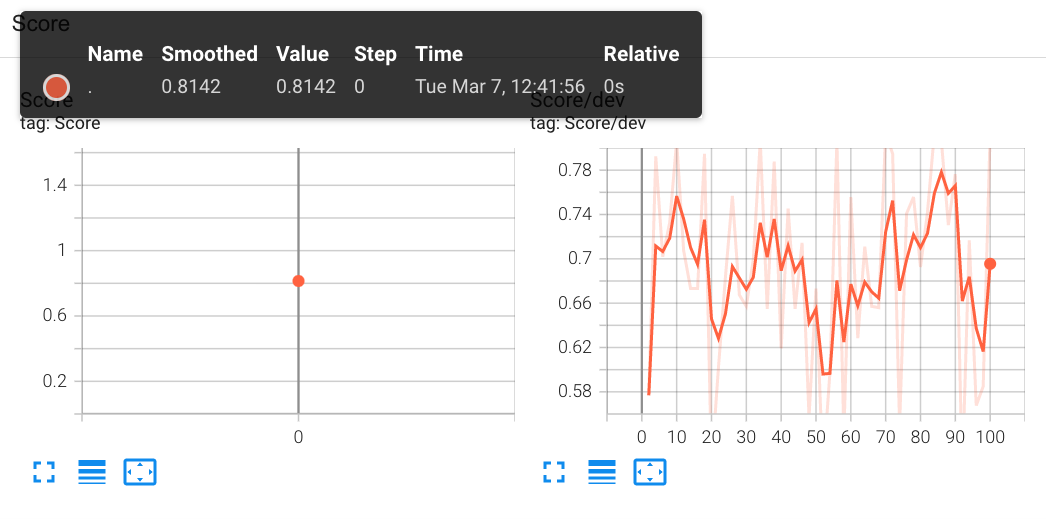

# Longer Training With Gradient-Search on SemEval and SST-2 datasets.

Using the Vector's Cluster and the Slurm scheduler, we can submit the following longer training jobs on
SemEval and SST-2 datasets. The script run_sentiment_experiments_gradient_search.sh will run training for longer. Run it in a cell below to analyze the results.

`!bash ./src/reference_implementations/prompt_zoo/training_scripts/run_sentiment_experiments_gradient_search.sh`

With longer training, we can further improve the result on semeval dataset to 62.36% accuracy! The optimal prompt now has both positive and negative labels incorporated.

In [16]:
# test on semeval using the model trained longer.
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --mode test \
    --task_name semeval \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path ${USER_DIR}/gradient_search_long_training/semeval \
    --prediction_file ${USER_DIR}/gradient_search_long_training/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \

2023-03-07 13:23:44.383442: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-07 13:23:44.383698: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-07 13:23:44.383908: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-07 13:23:44.384115: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-03-07 13:23:44.384151: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

# Longer Results on SemEval
Searched Template:
['negative', 'intrinsic', 'cazuri', 'negative', 'european', 'opéra', 'Fahrt', 'sentence', 'Positive']

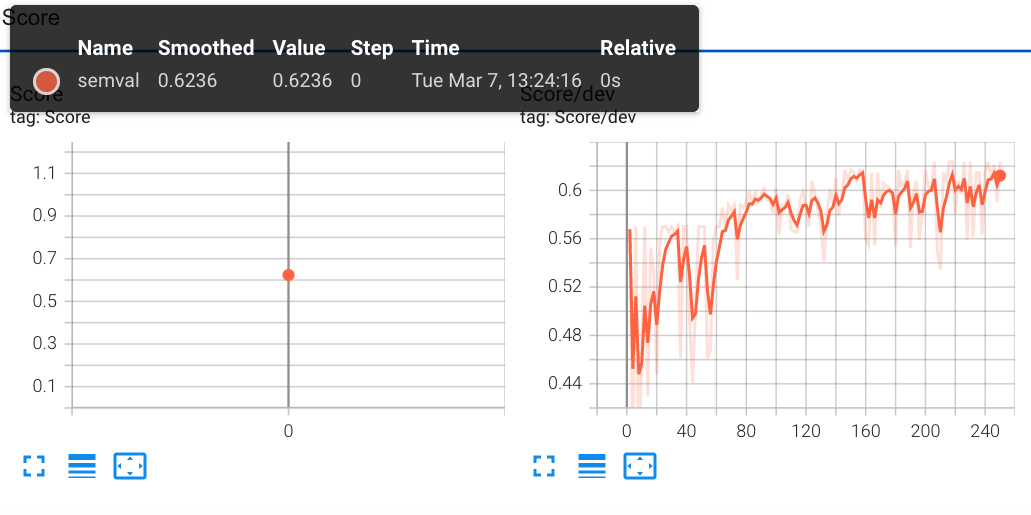

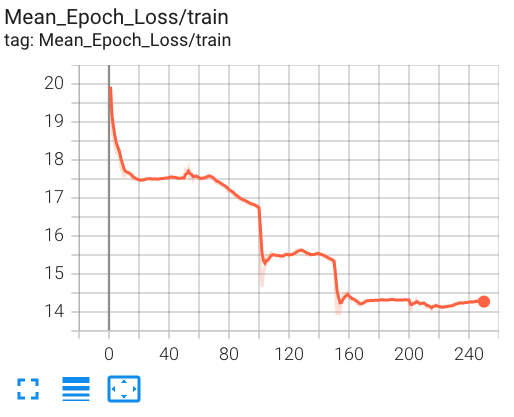

In [20]:
# test on sst2 using the model trained longer.
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --mode test \
    --task_name sst2 \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file validation \
    --model_path ${USER_DIR}/gradient_search_long_training/sst2 \
    --prediction_file ${USER_DIR}/gradient_search_long_training/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \

2023-03-07 15:29:01.011806: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-07 15:29:01.011914: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-07 15:29:01.011989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-07 15:29:01.012059: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-03-07 15:29:01.012092: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

# Longer Results on SST-2
Searched Template:
['childcare', 'negative', '.05.', 'Positive', 'respins', 'wSt', 'Thank', 'sentence', '.']. In this case, running longer improves the accuracy of the prompt on the validation set from 81.42% to 83.37%

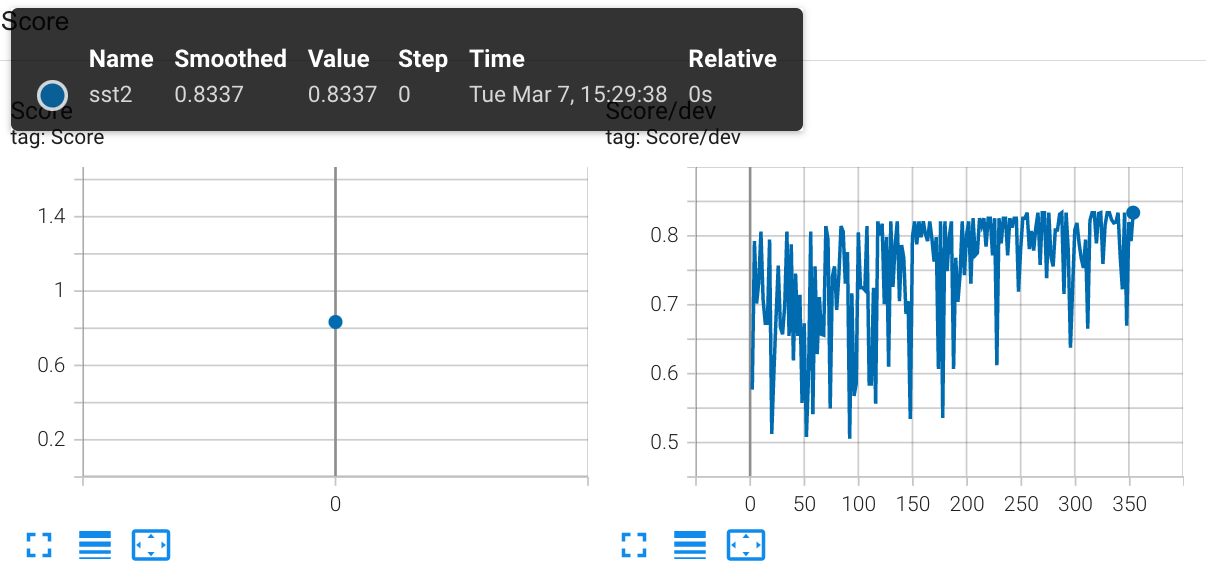

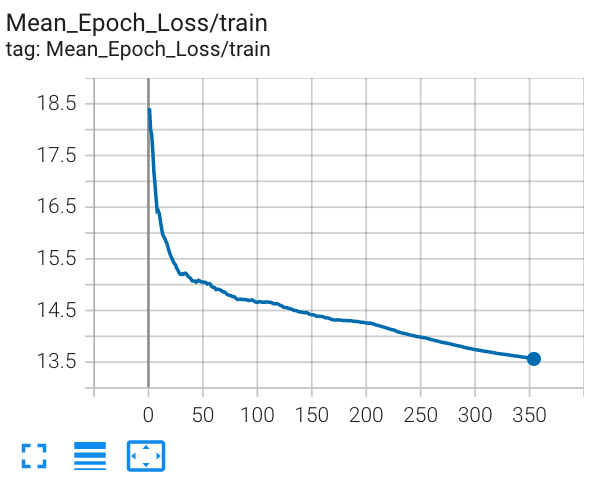